In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.offsetbox import AnchoredText

In [2]:
data = pd.read_excel('USD3MTD156N.xls', skiprows=10, header=0, index_col='observation_date')
data.index = pd.DatetimeIndex(data.index)


In [3]:
#tbill = pd.read_excel('DTB3.xls', skiprows=10, header=0, index_col="observation_date",)#na_values=['#=NA()'])  
tbill = pd.read_csv('DTB3.csv', header=0, index_col="DATE",na_values=['.'])#na_values=['#=NA()'])  
tbill.index = pd.DatetimeIndex(tbill.index)


In [13]:
data.head()

,USD3MTD156N
observation_date,
2009-01-02,1.41250
2009-01-05,1.42125
2009-01-06,1.41125
2009-01-07,1.39750
2009-01-08,1.35375


In [14]:
data.loc['2009-04-10']

USD3MTD156N   NaN
Name: 2009-04-10 00:00:00, dtype: float64

In [15]:
tbill.loc['2009-01-19']

DTB3   NaN
Name: 2009-01-19 00:00:00, dtype: float64

In [16]:
tbill

,DTB3
DATE,
2009-01-02,0.08
2009-01-05,0.14
2009-01-06,0.14
2009-01-07,0.11
2009-01-08,0.09
...,...
2020-05-15,0.12
2020-05-18,0.13
2020-05-19,0.13


In [22]:
rates = pd.concat((tbill, data), axis=1 )

In [33]:
rates.loc['2014-01-02']

DTB3           0.07000
USD3MTD156N    0.24285
Name: 2014-01-02 00:00:00, dtype: float64

In [27]:
(rates.DTB3 -rates.USD3MTD156N).describe()

count    2795.000000
mean       -0.320358
std         0.184256
min        -1.424630
25%        -0.377605
50%        -0.263380
75%        -0.209400
max        -0.087630
dtype: float64

<AxesSubplot:>

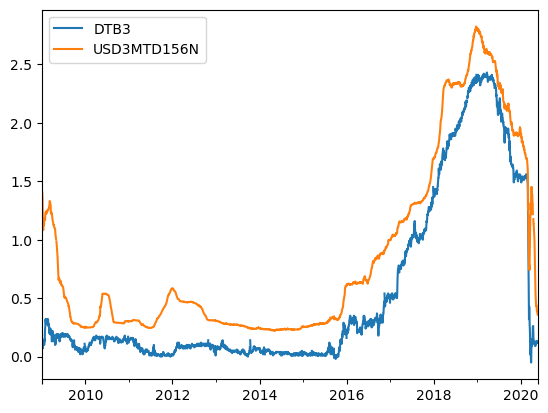

In [25]:
rates.plot()

In [8]:
plt.style.use('default')

Text(2014-02, -0.37285, 'Difference')

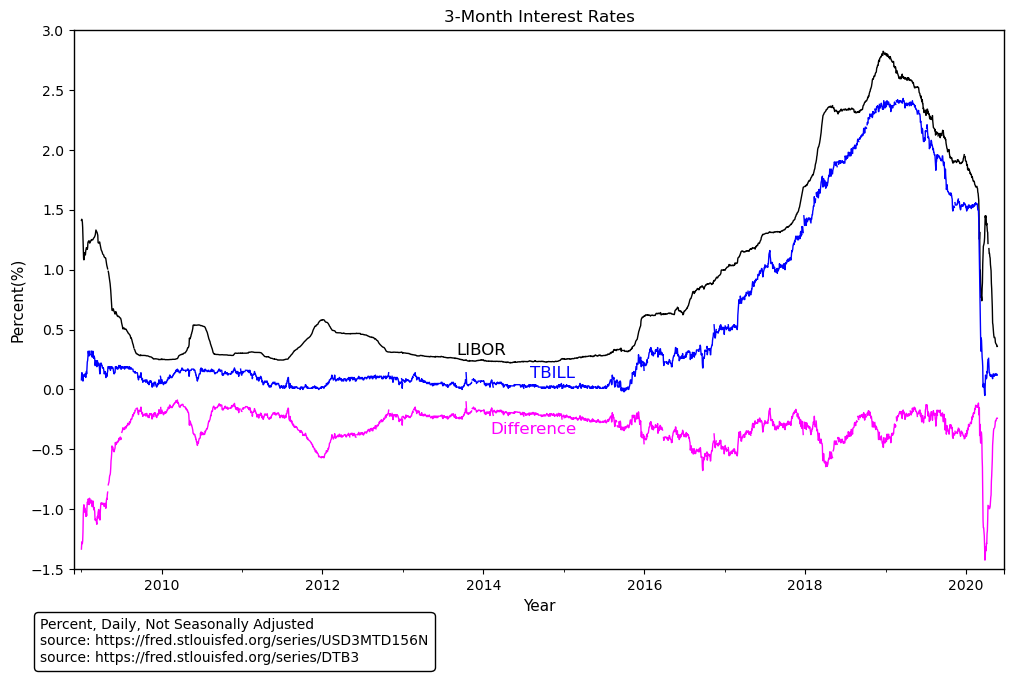

In [48]:
ax =data.plot(figsize=(12,7), color='k',legend=False, linewidth=1)
tbill.plot(ax=ax, color='b',linewidth=1, legend=False, )
(rates.DTB3 -rates.USD3MTD156N).plot(ax=ax, color='magenta',linewidth=1, legend=False, )
plt.ylabel('Percent(%)', fontsize=11)
plt.xlabel('Year', fontsize=11)
plt.title('3-Month Interest Rates', fontsize=12)
plt.xlim('2008-12-01', '2020-06-21')

plt.ylim(-1.5, 3)

t = 'Percent, Daily, Not Seasonally Adjusted '+\
'\nsource: https://fred.stlouisfed.org/series/USD3MTD156N'+\
'\nsource: https://fred.stlouisfed.org/series/DTB3'

at = AnchoredText(t, bbox_to_anchor=(-.05,-.2),loc='lower left', bbox_transform=ax.transAxes,
                  prop=dict(size=10), frameon=True, )

at.patch.set_boxstyle("round,pad=0.05,rounding_size=0.3")
ax.add_artist(at)

ax.spines[["bottom", "top", 'left', 'right']].set_linewidth(1)
ax.spines[["bottom", "top", 'left', 'right']].set_color('k')
#ax.grid(color='k', linewidth=1, linestyle='dotted')

ax.text('2013-09', data.loc['2014-01-02']+.05, 'LIBOR', fontsize=12)
ax.text('2014-08', tbill.loc['2014-01-02']+.03, 'TBILL', fontsize=12, color='b')
ax.text('2014-02', (rates.DTB3.loc['2014-01-02']-rates.USD3MTD156N.loc['2014-01-02'] -.2), 
        'Difference', fontsize=12, color='magenta')